In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

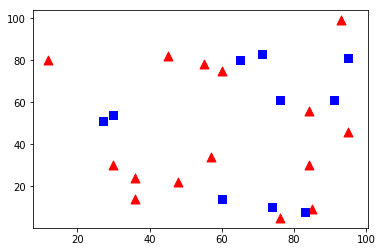

In [4]:
Data = np.random.randint(0,100,(25,2)).astype(np.float32)# np.random.randint es una funcion que crea un arreglo 
# con numeros aleatorios enteros entre 2 limites y de un tamaño especificado, en este caso de 0 a 99 y de tamaño [25,2]
clasificaciones = np.random.randint(0,2,(25)).astype(np.float32)

Rojo = Data[clasificaciones==0]#ravel cambia la forma de un arreglo a un vector plano [n], aqui lo usamos 
#para convertir nuestro arreglo de [25,1] a un vector de tamaño [25]

#red = trainData[responses.ravel()==0] esta operacion se llama indexado binario, responses.ravel()==0 crea un vector 
#binario donde donde es Verdadero en donde el vector responses.ravel() es igual a 0, todo lo demas es falso.
#Al meter este vector dentro de los corchetes del arreglo trainData, le estamos diciendo que le asigne a Rojo 
#unicamente las posiciones donde el vector es verdadero

plt.scatter(Rojo[:,0],Rojo[:,1],80,'r','^')

Azul = Data[clasificaciones==1]
plt.scatter(Azul[:,0],Azul[:,1],80,'b','s')

plt.show()

In [6]:
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)

knn = cv2.ml.KNearest_create() # creamos un clasificador KNN
knn.train(Data,cv2.ml.ROW_SAMPLE,clasificaciones)#Lo entrenamos con las clases que generamos, primero los valores, luego
#las clases correspondientes

ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)
print ("result: ", results,"\n")
print ("neighbours: ", neighbours,"\n")
print ("distance: ", dist)

result:  [[0.]] 

neighbours:  [[0. 1. 0.]] 

distance:  [[ 97. 193. 229.]]


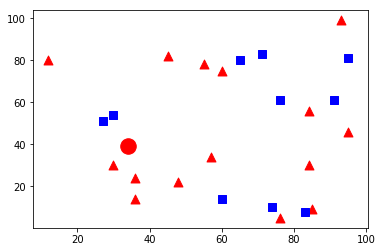

In [7]:
plt.scatter(Rojo[:,0],Rojo[:,1],80,'r','^')
plt.scatter(Azul[:,0],Azul[:,1],80,'b','s')
if results==0:
    plt.scatter(newcomer[:,0],newcomer[:,1],240,'r','o')
else:
    plt.scatter(newcomer[:,0],newcomer[:,1],240,'b','o')
    
plt.show()

In [9]:
#Practica abajo se cargan de un archivo de datos numpy que contiene groupos de puntos [A,B,C], cada grupo es
#una clase. El ultimo grupo Z son puntos revueltos 
#Usando KNN assigna los puntos en Z a sus clases correspondientes y plotea todos los puntos A,B,C,Z
with np.load('datosKNN.npz') as L:
            A, B,C,Z=\
            [L[i] for i in ('A','B','C','Z')]

#np.savez('datosKNN',A=A,\
#         B=B, C=C, D=D, Z=Z)

In [17]:
print(A.shape)
print(B.shape)
print(C.shape)

(26, 2)
(25, 2)
(37, 2)


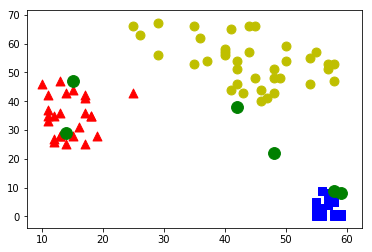

In [22]:
plt.scatter(A[:,0],A[:,1],80,'r','^')
plt.scatter(B[:,0],B[:,1],80,'b','s')
plt.scatter(C[:,0],C[:,1],80,'y')
plt.scatter(Z[:,0],Z[:,1],140,'g')
lista=np.vstack((A,B,C)).astype(np.float32)

clasifi=np.vstack((np.ones((26,2)),np.ones((25,2))*2,np.ones((37,2))*3)).astype(np.float32)
plt.show()

In [23]:
knn.train(lista,cv2.ml.ROW_SAMPLE,clasifi)#Lo entrenamos con las clases que generamos, primero los valores, luego
#las cla

True

In [26]:
Z.shape

(6, 2)

In [25]:

ret, results, neighbours ,dist = knn.findNearest(Z, 3)
print ("result: ", results,"\n")
print ("neighbours: ", neighbours,"\n")
print ("distance: ", dist)

result:  [[1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]] 

neighbours:  [[1. 1. 1.]
 [1. 1. 1.]
 [2. 2. 2.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

distance:  [[  4.   9.  17.]
 [  0.   2.   2.]
 [ 20.  26.  34.]
 [233. 269. 269.]
 [  0.   0.   2.]
 [  0.   0.   0.]]
